## Trabajo No. 4

### Sobre: Regresión Logística
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataFrame = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataset.head()

In [47]:
dataset = dataset.drop("customerID", axis=1)
#dataset

In [48]:
encode = LabelEncoder()
for column in dataset.columns:
    if(column != "tenure" and column != "MonthlyCharges" and column != "TotalCharges"):
        dataset[column] = encode.fit_transform(dataset[column].values)
#dataset

In [49]:
#print dataset.count()
#col_names = dataset.columns.tolist()
#for column in col_names:
#    print "Valores nulos en <{0}>: {1}".format(column, dataset[column].isnull().sum())
dataset[dataset.TotalCharges == ' '] = '0'
dataset[dataset.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [50]:
for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)

#dataset['tenure'] = dataset['tenure'].astype(float)
#dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
#dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

dataset['tenure'] = dataset['tenure']*0.01
dataset['MonthlyCharges'] = dataset['MonthlyCharges']*0.1
dataset['TotalCharges'] = dataset['TotalCharges']*0.001
#dataset['tenure'] = np.round(dataset['tenure'].values,2)
#dataset['MonthlyCharges'] = np.round(dataset['MonthlyCharges'].values,2)
#dataset['TotalCharges'] = np.round(dataset['TotalCharges'].values,2)
dataset.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.01,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.985,0.02985,0.0
1,1.0,0.0,0.0,0.0,0.34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,5.695,1.88950,0.0
2,1.0,0.0,0.0,0.0,0.02,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.385,0.10815,1.0
3,1.0,0.0,0.0,0.0,0.45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,4.230,1.84075,0.0
4,0.0,0.0,0.0,0.0,0.02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.070,0.15165,1.0


In [51]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.01,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.985,0.02985,0.0
1,1.0,0.0,0.0,0.0,0.34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,5.695,1.88950,0.0
2,1.0,0.0,0.0,0.0,0.02,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.385,0.10815,1.0
3,1.0,0.0,0.0,0.0,0.45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,4.230,1.84075,0.0
4,0.0,0.0,0.0,0.0,0.02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.070,0.15165,1.0


In [52]:
#arr_X = dataset[dataset.columns[0:19]].as_matrix()
#arr_Y = dataset[dataset.columns[-1]].as_matrix()
arr_X = np.array(dataset.drop(['Churn'],1))
arr_Y = np.array(dataset['Churn'])

In [53]:
x_train, x_test, y_train, y_test = train_test_split(arr_X, arr_Y, test_size=0.3)

In [54]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [55]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [56]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [57]:
def loss(y, a):
#   for i in range(len(a)):
#       if((1 - a[0][i]) <= 1):
#            a[0][i] = 0.99
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [58]:
def cost(logloss):
    return np.mean(logloss)

In [59]:
def score(YP, Y):
    K = Y - YP
    j = 0
    for i in range(len(K[0])):
        if(K[0][i] != 0):
            j +=1
    return (100-(j*100)/len(K[0]))

In [60]:
def y_preddict(Y_hat, Y):
    YP = np.round(Y_hat)
    K = Y - YP
    #len(K[0])
    #print K[0]
    #error = (j*100)/len(K[0])
    #print("El error es de "+str(error)+"% con una efectividad de "+str(100-error)+"%")
    #print YP.shape
    #print Y.shape
    print("Efectividad de "+str(score(YP,Y))+"%")
    print("Error de "+str(mean_squared_error(Y, YP)*100)+"%")

In [61]:
print arr_X[0].shape[0]
print x_train.T.shape[1]

19
4930


In [62]:
#seed = 2
#np.random.seed(seed)
#X = np.random.rand(10,5)##matriz de 10 x 5 donde 10 son las feactures
def logistic_regresion(learning_rate, epochs, num_cost_mod):
    X = x_train.T
    Y = np.array([y_train])
    m = X.shape[1]
    #print(X.shape)
    #print(Y.shape)

    W = np.random.randn(arr_X[0].shape[0],1)#Matriz de 10 x 1 donde 10 son las feactures random
    b = 0.1

    #print("m: ", m)
    #print("W inicial: ",W)
    #print("b inicial: ",b)

    #learning_rate = 0.2
    cost_list = []

    for i in range(epochs): #1000 iteraciones del descenso del gradiente
        '''
        Activacion hacia adelante
        '''
        Z = linear_activation(W,b,X)
        A = sigmoid(Z)

        '''
        Activacion hacia atras - retropropagacion del error
        '''
        dz = A - Y
        dW = np.dot(X,dz.T) / m
        db = np.sum(dz) / m

        '''
        Actualizacion de parametros mediante descenso del gradiente
        '''
        W -= learning_rate * dW
        b -= learning_rate * db

        J = cost(loss(Y,A))

        if(i%num_cost_mod == 0):
            cost_list.append(J)
            #print(A)
            #print(Y)
            #print("costo: ", J)

    #print("W actualizado: ",W)
    #print("b actualizado: ",b)
    #print("costo total: ", J)

    plt.plot(cost_list)
    plt.show()

    return {'W':W, 'b':b, 'X':X, 'Y':Y}

-------------------------------------------------------------------------------


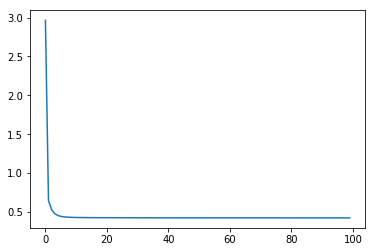

Learning rate = 0.1
Epochs = 10000
Efectividad de 81%
Error de 19.614604462474645%
-------------------------------------------------------------------------------


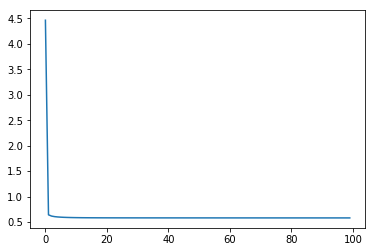

Learning rate = 0.3
Epochs = 10000
Efectividad de 74%
Error de 26.16632860040568%
-------------------------------------------------------------------------------


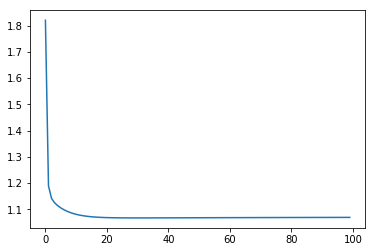

Learning rate = 0.5
Epochs = 10000
Efectividad de 75%
Error de 25.496957403651116%
-------------------------------------------------------------------------------


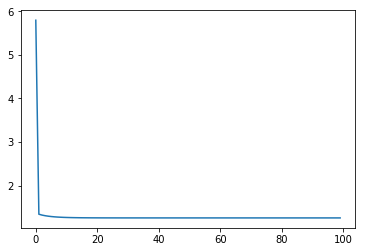

Learning rate = 0.7
Epochs = 10000
Efectividad de 71%
Error de 29.71602434077079%
-------------------------------------------------------------------------------


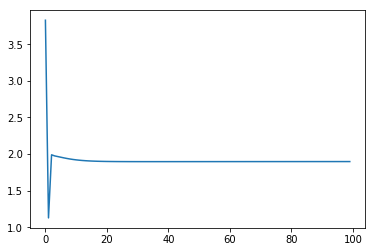

Learning rate = 0.9
Epochs = 10000
Efectividad de 75%
Error de 25.31440162271805%
-------------------------------------------------------------------------------


C:\Users\SergioEscudero\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\SergioEscudero\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


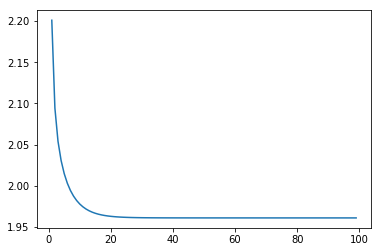

Learning rate = 1.1
Epochs = 10000
Efectividad de 70%
Error de 30.344827586206897%
-------------------------------------------------------------------------------


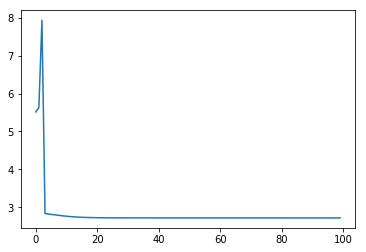

Learning rate = 1.3
Epochs = 10000
Efectividad de 75%
Error de 25.09127789046653%
-------------------------------------------------------------------------------


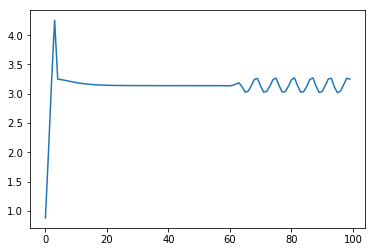

Learning rate = 1.5
Epochs = 10000
Efectividad de 76%
Error de 24.88843813387424%
-------------------------------------------------------------------------------


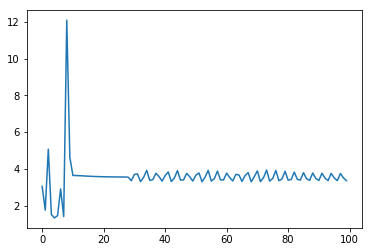

Learning rate = 1.7
Epochs = 10000
Efectividad de 75%
Error de 25.57809330628803%
-------------------------------------------------------------------------------


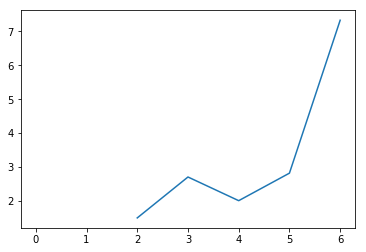

Learning rate = 1.9
Epochs = 10000
Efectividad de 69%
Error de 31.379310344827587%


In [44]:
#learning_rate = 0.05
learning_rate = 0.1
modulo = 100
for i in range(10):
    epochs = 10000
    print '-------------------------------------------------------------------------------'
    valores = logistic_regresion(learning_rate, epochs, modulo)
    W = valores['W']
    b = valores['b']
    X = valores['X']
    Y = valores['Y']
    #Y_hat.np.append(predict(W,b,X), axis=0)
    Y_hat = predict(W,b,X)
    print 'Learning rate = ' + str(learning_rate)
    print 'Epochs = ' + str(epochs)
    y_preddict(Y_hat, Y)
    #learning_rate += 0.05
    learning_rate += 0.2
    #print("predicciones: ",np.round(Y_hat))
    #print("clases originales: ", Y)

In [24]:
mean_squared_error(y_test, Y_hat)

ValueError: Found input variables with inconsistent numbers of samples: [2113, 1]

In [20]:
from sklearn import linear_model
X = np.array(dataset.drop(['Churn'],1))
y = np.array(dataset['Churn'])
print X.shape
print y.shape

(7043L, 19L)
(7043L,)


In [21]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions = model.predict(X)

In [23]:
model.score(X,y)*100

80.47706943064034